# Web Scraping and Text Analysis of Buddhist Websites: How Belgians think about Buddhism

The goal of this project is to gain a better understanding of how people in Belgium think about and practice Buddhism by analyzing texts provided by a popular Buddhist website. These texts are both prayers and general guidance on Buddhism, and by seeing what the focus on, we may gain a better understanding of what aspects of Buddhism have been imported and what aspects were left behind.

In [ ]:
pip install pandas beautifulsoup4 requests

In [1]:
# I begin by importing the libraries I will be making use of, most notably BeautifulSoup for web scraping.
import requests
from bs4 import BeautifulSoup
import urllib.request as urllib
import re

# I then specificy the url of the page I wish to work with and use its html exclusively, since I am only interested in the 
# content rather than any graphic elements.
url = 'https://www.mahakarunaleuven.be/Zenteksten/Sutras/'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)

# Because I wanted to avoid extracting messy data, I turned to Stackoverflow, where they recommended a combination of using 
# the library re for cleaning the text and the function extract() to only get the visible text.
[s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
visible_text1 = re.sub(r'\n\s*\n', r'\n\n', soup.getText().strip(), flags=re.M)

# I then print it to ensure that everything went right in the webscraping process.
print(visible_text1)

Maha Karuna Leuven

WelkomAgendaSesshinsBlogTekstenSutraTeisho'sTekstenPoezieRedactionele artikelsMoeilijke woordenMK VlaanderenContact

Wat zijn sutras en waarom worden ze uitgesproken/gezongen?

	Het woord ‘sutra’ (Sanskriet) of ‘sutta’ (Pali) verwijst naar de officiële boeddhistische onderrichtingen. Oorspronkelijk beperkte de term zich tot de mondeling overgeleverde leerredes van de Boeddha zoals die werden gememoriseerd door zijn meest vooraanstaande leerlingen. Voor het boeddhisme van het ‘Grote Voertuig' (Mahayana) horen evenwel niet enkel de leerredes van de Boeddha maar ook de geschriften van latere, hoog gewaardeerde auteurs tot de officiële canon. Deze laatste sutra’s werden geacht te zijn uitgesproken/opgeschreven vanuit de ware boeddha-aard. Zo is bijvoorbeeld de zeer gewaardeerde Hart Sutra, een van de centrale sutra’s in de Mahayana-traditie, pas enkele eeuwen na de dood van de historische Boeddha opgeschreven. Andere suytra's staan op naam van bijv. Santideva en Rhahula

I repeat the previous step for each subpage with different kinds of texts, but this time without printing them.

In [2]:
url = 'https://www.mahakarunaleuven.be/Zenteksten/teishos/'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)
[s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
visible_text2 = re.sub(r'\n\s*\n', r'\n\n', soup.getText().strip(), flags=re.M)

In [3]:
url = 'https://www.mahakarunaleuven.be/Zenteksten/teksten/'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)
[s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
visible_text3 = re.sub(r'\n\s*\n', r'\n\n', soup.getText().strip(), flags=re.M)

In [4]:
url = 'https://www.mahakarunaleuven.be/Zenteksten/poezie/'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)
[s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
visible_text4 = re.sub(r'\n\s*\n', r'\n\n', soup.getText().strip(), flags=re.M)

In [5]:
url = 'https://www.mahakarunaleuven.be/Zenteksten/redactionele%20artikels/'
html = urllib.urlopen(url).read()
soup = BeautifulSoup(html)
[s.extract() for s in soup(['style', 'script', '[document]', 'head', 'title'])]
visible_text5 = re.sub(r'\n\s*\n', r'\n\n', soup.getText().strip(), flags=re.M)

Next, I save all the collected data into a text file for easy access. The first part of this project deals with comparison, so I begin by putting all the texts together. Later, I will separate them to analyze them on their own and contrast them.

In [7]:
scraped_data = [visible_text1, visible_text2, visible_text3, visible_text4, visible_text5]
with open('buddhist_texts.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(scraped_data))

This next function cleans the text file and normalizes it. This function substitutes punctuation for spaces, turns all uppercase into lowercase, and gets rid of words shorter than 2 letters because in most cases they were random letters that showed up, or they were words that would not be particularly useful (such as "we" or "je"), Lastly, it creats a new text file with the clean contents.

However, even though I deleted the words "we" and "je", they already call attention to certain characteristics of these texts: they call to collectiveness, to community, but they also seem to call out to the reader in particular to pay attention or to take some course of action.

In [69]:
import string

def normalize(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()
        
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text_with_spaces = text.translate(translator)
    text_lowercase = text_with_spaces.lower()

    words = text_lowercase.split()

    filtered_words = [word for word in words if len(word) > 2]

    normalized_text = ' '.join(filtered_words)

    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(normalized_text)
        
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/buddhist_texts.txt'
output_filename = 'buddhist_texts_normalized.txt'
normalize(input_filename, output_filename)


In [ ]:
import nltk
nltk.download('stopwords')

This next function processes the text to get rid of stopwords by making use of the NLTK library to import stopwords from Dutch; I also set my own stopwords in order to get rid of some that still popped up ocassionally. Finally, the function tokenizes the text and creates a frequency dictionary that only takes in words used more than once.

In [137]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(input_file):
    with open(input_file, 'r',encoding='utf-8') as file:
        text = file.read()
        
    custom_stopwords = ['wij','alle','onze','waar','zoals']    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('dutch'))
    stop_words.update(set(string.punctuation))
    stop_words.update(set(custom_stopwords))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

    from collections import defaultdict
    frequency = defaultdict(int)
    for token in tokens:
        frequency[token] += 1
        
    processed_corpus = [token for token in tokens if frequency[token] > 1]
    return processed_corpus

In [83]:
processed_corpus = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/buddhist_texts_normalized.txt')

These next functions return the 20 most common words that repeat throughout the text and their position in the text.

In [142]:
def top_20(corpus):
    freq_dict = {}
    for item in corpus:
        if item not in freq_dict:
            freq_dict[item] = 1
        else:
            freq_dict[item] += 1
        
    sorted_dictionary = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_dictionary[:20]

In [143]:
top_20(processed_corpus)

[('leven', 147),
 ('lijden', 92),
 ('weg', 75),
 ('grote', 74),
 ('boeddha', 71),
 ('wereld', 67),
 ('gaat', 60),
 ('vraag', 59),
 ('zien', 55),
 ('mensen', 53),
 ('geest', 53),
 ('plaats', 50),
 ('zitten', 48),
 ('eigen', 47),
 ('elke', 47),
 ('zelfs', 47),
 ('hart', 46),
 ('dood', 43),
 ('anderen', 42),
 ('wel', 42)]

That the words "Boeddha" or "leven" come up so often makes sense, but the lack of references to reincarnation or to Nirvana, coupled with the incidence of "lijden" and "wereld" may hint that Belgian Buddhism focuses more on worldly concerns and how to better live one's life, rather than with more spiritual beliefs. The general trend in the West when adopting Buddhism has followed this practice of stripping the religion down to its most practical aspects, and it comes as no surprise that Belgium is no exception.

In order to later create the graph that will show the relative position of each word within the text, I decided to take a look at the multiple positions of each word within the text.

In [164]:
most_common_words =['leven', 'lijden','weg','grote','boeddha','wereld','gaat','vraag','zien','mensen','geest','plaats','zitten',
                   'eigen','elke','zelfs','hart','dood','anderen','wel']

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/buddhist_texts_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    word_pos = {}
    
for word in most_common_words:
    word_pos[word] = [i for i, x in enumerate(words) if x == word]
    
print(word_pos)

{'leven': [211, 269, 1046, 1186, 1225, 1234, 1900, 1906, 2080, 2088, 2092, 2158, 2287, 2350, 2989, 3333, 3336, 4335, 4667, 4723, 4901, 4918, 4935, 4964, 5257, 5271, 5287, 5437, 5445, 5453, 5510, 5517, 5537, 5557, 5568, 5574, 5619, 5621, 5626, 5753, 5767, 5819, 5892, 5907, 5909, 5932, 6002, 6008, 6164, 6171, 6186, 6324, 6488, 6615, 6801, 6848, 7177, 7555, 7789, 8369, 8502, 8613, 8636, 8659, 8686, 9218, 9862, 9878, 10053, 10067, 10366, 10660, 11033, 11543, 11689, 11798, 11806, 12020, 12024, 12041, 12084, 12147, 12699, 13621, 14052, 14057, 14060, 14065, 14299, 14300, 14518, 14523, 14615, 14741, 14801, 14933, 15042, 15219, 15271, 16231, 16399, 16981, 17408, 17728, 17757, 17836, 17960, 18122, 18436, 19312, 19824, 22190, 22473, 22634, 23282, 23332, 23336, 23340, 23424, 23472, 23480, 23504, 23725, 23789, 23796, 24430, 24493, 25026, 25184, 25568, 26365, 26368, 26374, 26386, 26392, 26397, 26413, 26545, 26696, 26846, 27694, 27937, 28188, 28341, 28734, 28824, 28962], 'lijden': [285, 457, 464, 552

With inspiration from the Voyant-Tools, I endeavored to create a graph that would divide up the whole text into 10 segments and check the relative frequency

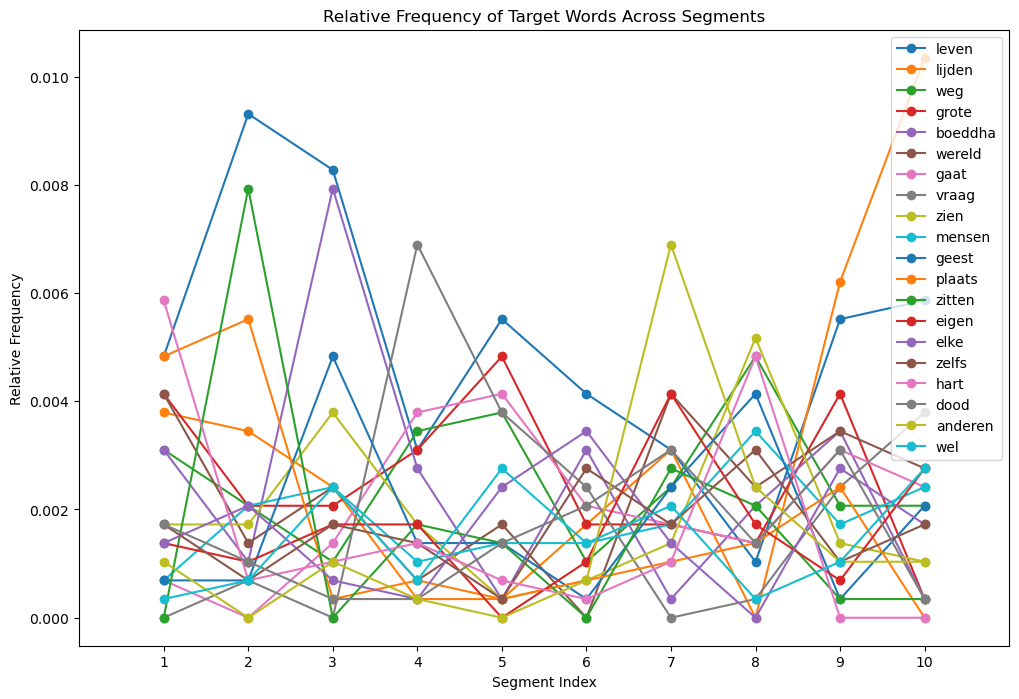

In [189]:
from nltk.probability import FreqDist
import numpy as np

most_common_words = ['leven', 'lijden','weg','grote','boeddha','wereld','gaat','vraag','zien','mensen','geest','plaats','zitten',
                   'eigen','elke','zelfs','hart','dood','anderen','wel']
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/buddhist_texts_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)

import matplotlib.pyplot as plt

def divide_text_into_segments(text, num_segments):
    segment_size = len(words) // num_segments
    remainder = len(words) % num_segments

    segments = [words[i * segment_size + min(i, remainder):(i + 1) * segment_size + min(i + 1, remainder)] for i in range(num_segments)]
    return segments

def calculate_relative_frequencies(segment, target_words):
    freq_dist = FreqDist(segment)
    total_words = len(segment)
    return [freq_dist[word] / total_words if total_words > 0 else 0 for word in target_words]

def plot_relative_frequencies_over_segments(text, target_words, num_segments):
    segments = divide_text_into_segments(text, num_segments)

    plt.figure(figsize=(12, 8))

    for word in target_words:
        relative_frequencies = [calculate_relative_frequencies(segment, [word])[0] for segment in segments]
        plt.plot(np.arange(1, num_segments + 1), relative_frequencies, marker='o', label=word)

    plt.xlabel("Segment Index")
    plt.ylabel("Relative Frequency")
    plt.title("Relative Frequency of Target Words Across Segments")
    plt.legend()
    plt.xticks(np.arange(1, num_segments + 1))
    plt.xlim(0, num_segments+1)
    plt.show()
    
plot_relative_frequencies_over_segments(words, most_common_words, num_segments)


However, this initial graph can be a bit confusing due to the amount of information it displays. I then decided to make the same graph, but only showing the five most common words.

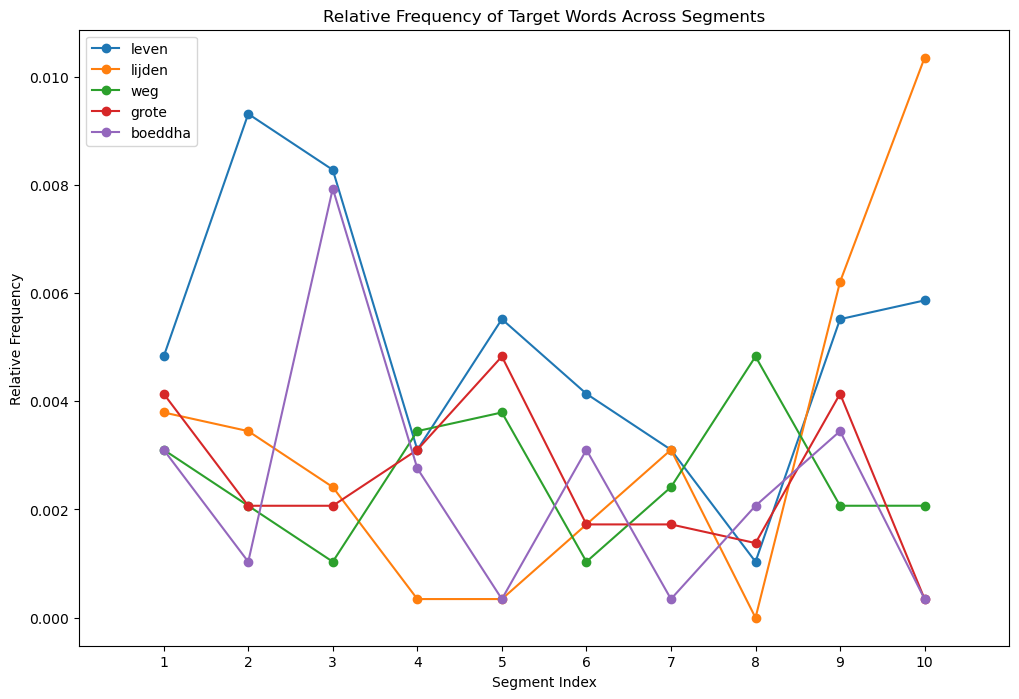

In [190]:
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

With this much more comprehensible graph, I can easily see that "leven" and "boeddha" almost completely coincide in segments 3, 4, 6, and 8, which might mean that these segment either speak on the life of the Buddha, or that these segments seek to explain how to live through the example of the Buddha. On a different note, "lijden" does not appear very frequently until it peaks in segments 9 and 10, which may indicate that the latter segments are much more focused on Maya and detachment.

I will now divide each of the texts into separate documents and perform similar analyses of these five words and of their own most frequent words.

In [191]:
with open('sutras.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(visible_text1))
    
with open('teishos.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(visible_text2))
    
with open('teksten.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(visible_text3))
    
with open('poezie.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(visible_text4))
    
with open('artikels.txt', 'w', encoding='utf-8') as textfile:
    textfile.write(str(visible_text5))

In [192]:
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/sutras.txt'
output_filename = 'sutras_normalized.txt'
normalize(input_filename, output_filename)

In [193]:
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teishos.txt'
output_filename = 'teishos_normalized.txt'
normalize(input_filename, output_filename)

In [194]:
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teksten.txt'
output_filename = 'teksten_normalized.txt'
normalize(input_filename, output_filename)

In [195]:
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/poezie.txt'
output_filename = 'poezie_normalized.txt'
normalize(input_filename, output_filename)

In [196]:
input_filename = 'C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/artikels.txt'
output_filename = 'artikels_normalized.txt'
normalize(input_filename, output_filename)

In [197]:
processed_sutras = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/sutras_normalized.txt')

processed_teishos = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teishos_normalized.txt')

processed_teksten = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teksten_normalized.txt')

processed_poezie = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/poezie_normalized.txt')

processed_artikels = preprocess_text('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/artikels_normalized.txt')

In [198]:
top_20(processed_sutras)

[('mag', 30),
 ('wijsheid', 27),
 ('jij', 23),
 ('mogen', 23),
 ('gegroet', 21),
 ('jou', 20),
 ('wees', 20),
 ('hart', 19),
 ('mededogen', 19),
 ('allen', 18),
 ('hen', 17),
 ('voorbij', 15),
 ('leven', 15),
 ('grote', 14),
 ('plaats', 14),
 ('wereld', 12),
 ('iedereen', 12),
 ('kuan', 11),
 ('lijden', 11),
 ('vorm', 11)]

In [199]:
top_20(processed_teishos)

[('leven', 95),
 ('boeddha', 46),
 ('grote', 43),
 ('vraag', 40),
 ('zitten', 40),
 ('weg', 39),
 ('gaat', 37),
 ('lijden', 33),
 ('even', 32),
 ('geest', 32),
 ('zullen', 31),
 ('seijo', 31),
 ('elke', 30),
 ('laat', 30),
 ('wereld', 30),
 ('wel', 28),
 ('gaan', 28),
 ('werkelijkheid', 28),
 ('alleen', 27),
 ('zien', 27)]

In [200]:
top_20(processed_teksten)

[('anderen', 27),
 ('oefening', 23),
 ('hart', 17),
 ('weg', 14),
 ('liefde', 13),
 ('mensen', 13),
 ('geest', 12),
 ('eigen', 11),
 ('zelfs', 11),
 ('moeten', 10),
 ('dingen', 10),
 ('zazen', 9),
 ('mens', 8),
 ('kwaad', 8),
 ('noch', 8),
 ('mededogen', 7),
 ('ware', 7),
 ('oefenen', 7),
 ('denken', 7),
 ('jezelf', 7)]

In [201]:
top_20(processed_poezie)

[('zien', 9),
 ('leven', 8),
 ('één', 4),
 ('zeggen', 4),
 ('sterren', 4),
 ('bloemen', 4),
 ('tijd', 4),
 ('dood', 4),
 ('nee', 4),
 ('opnieuw', 4),
 ('minder', 4),
 ('waarom', 3),
 ('horen', 3),
 ('wanneer', 3),
 ('hoek', 3),
 ('reis', 3),
 ('terug', 3),
 ('proberen', 3),
 ('gaat', 2),
 ('fernando', 2)]

In [202]:
top_20(processed_artikels)

[('lijden', 48),
 ('hisamatsu', 31),
 ('leven', 25),
 ('bestaan', 22),
 ('discipline', 19),
 ('wereld', 18),
 ('vraag', 18),
 ('gaat', 15),
 ('enkel', 15),
 ('nihilisme', 15),
 ('woorden', 14),
 ('zen', 14),
 ('vormen', 14),
 ('staat', 13),
 ('ontwaken', 13),
 ('weg', 12),
 ('elke', 12),
 ('mens', 12),
 ('grote', 11),
 ('boeddha', 11)]

As we can see, the most common words in each of the texts separately yields some unhelpful results, such as "jij" or "één", so I will discard those when making each graph. I will begin by plotting the incidence of the original 5 most common words of all of the texts together, and then move on to graph the 5 most common words in each of the sections.

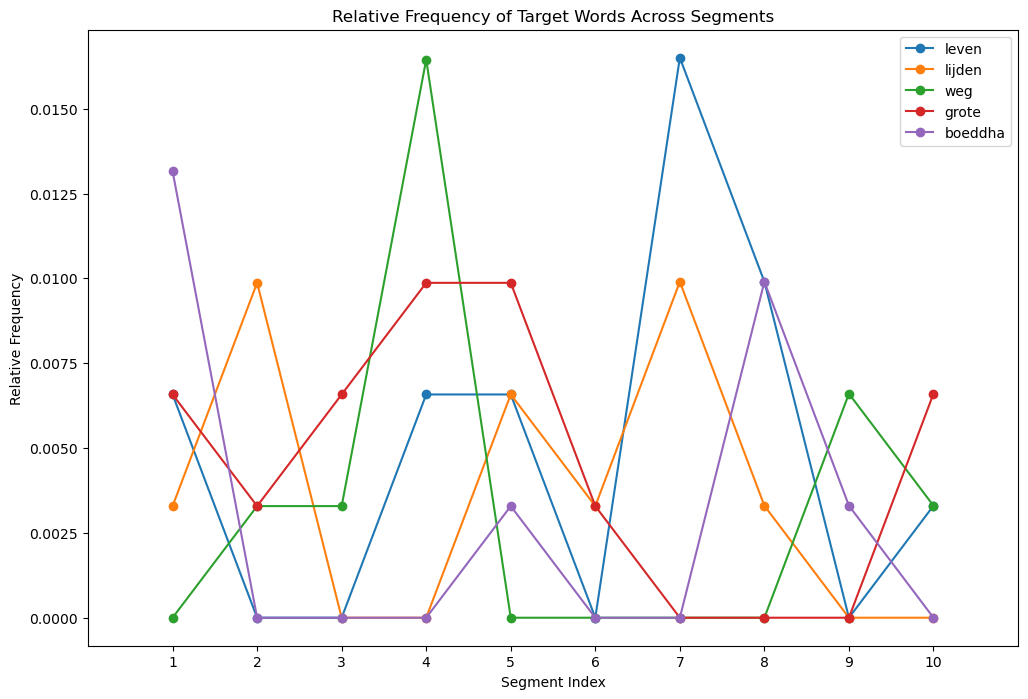

In [203]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/sutras_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

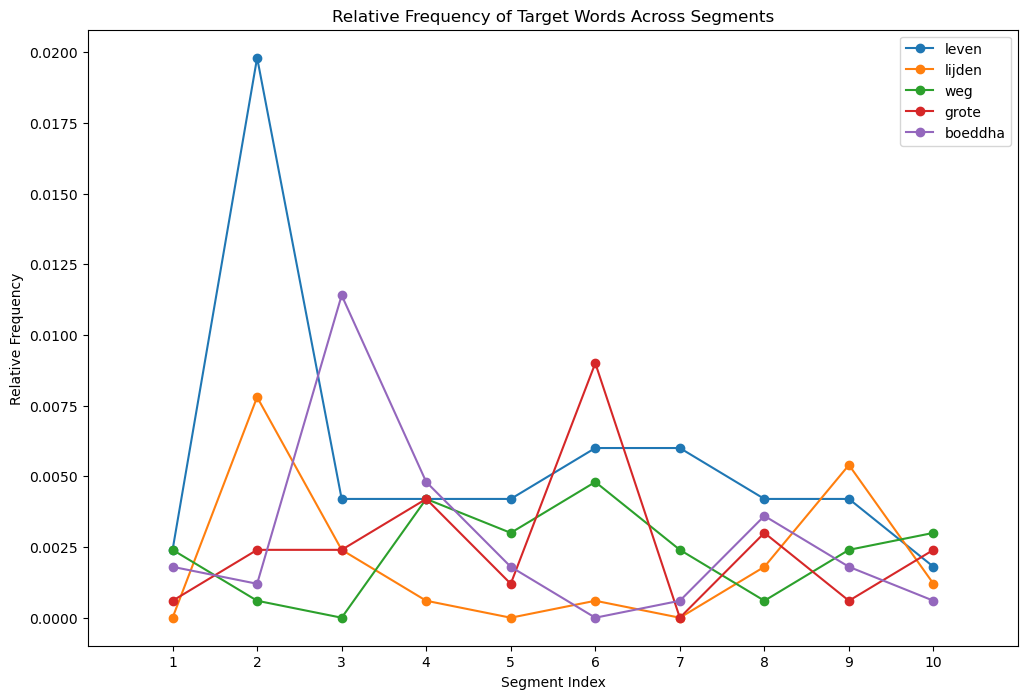

In [204]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teishos_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

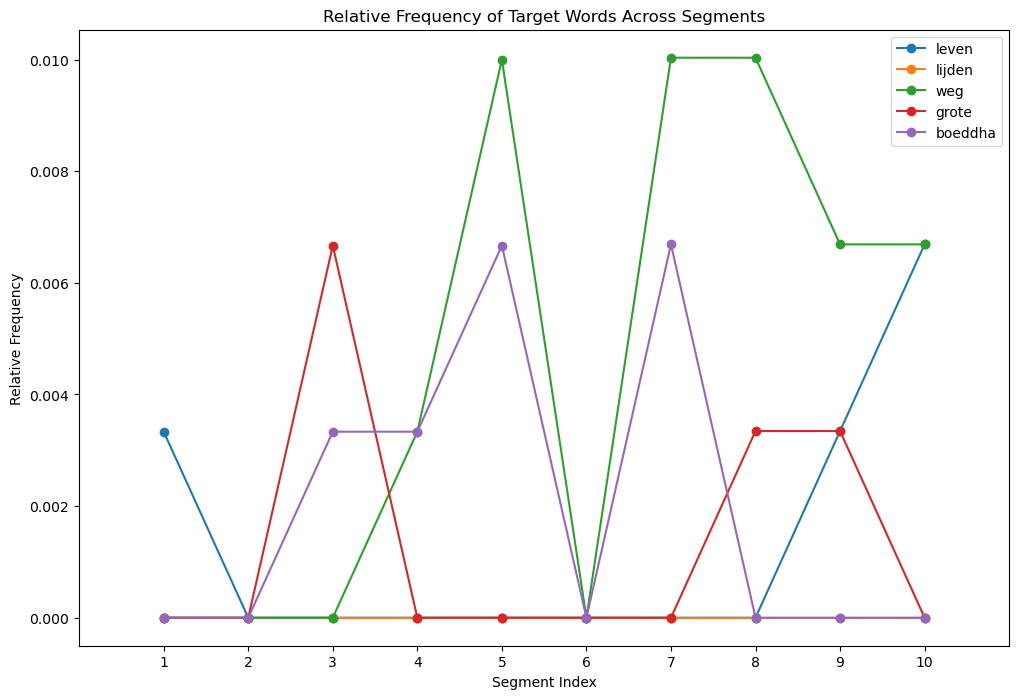

In [205]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teksten_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

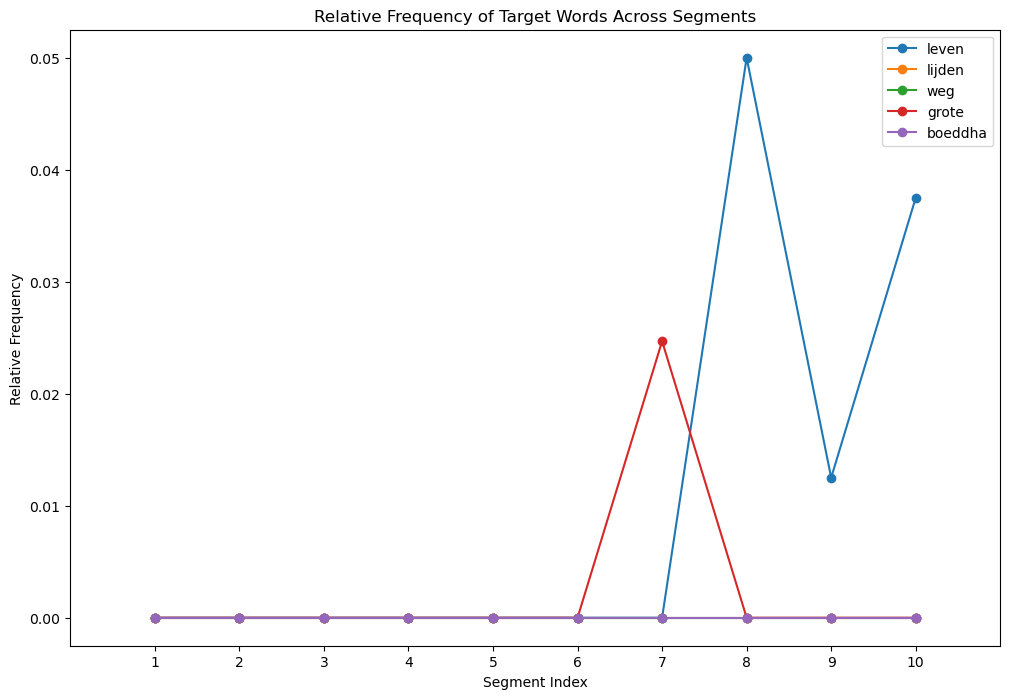

In [206]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/poezie_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

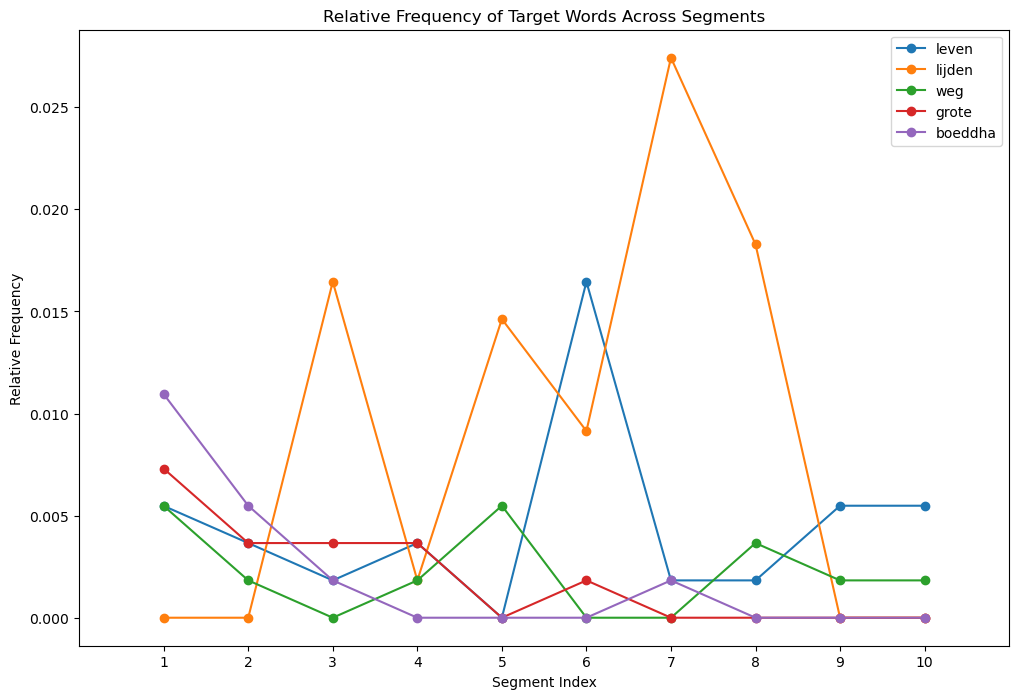

In [207]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/artikels_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'lijden','weg','grote','boeddha']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

As we can see, each of the sections seem to focus on quite different themes, most notably poezie, which only shows incidences of "grote" and "leven", hinting that the poetry provided does not directly make use of Buddhist texts, but may somehow relate to its philosophies. As expected, "lijden" mostly shows up on the last section, the section for articles, again showing perhaps a more modern preoccupation with suffering than previous Buddhist teachers may have had.

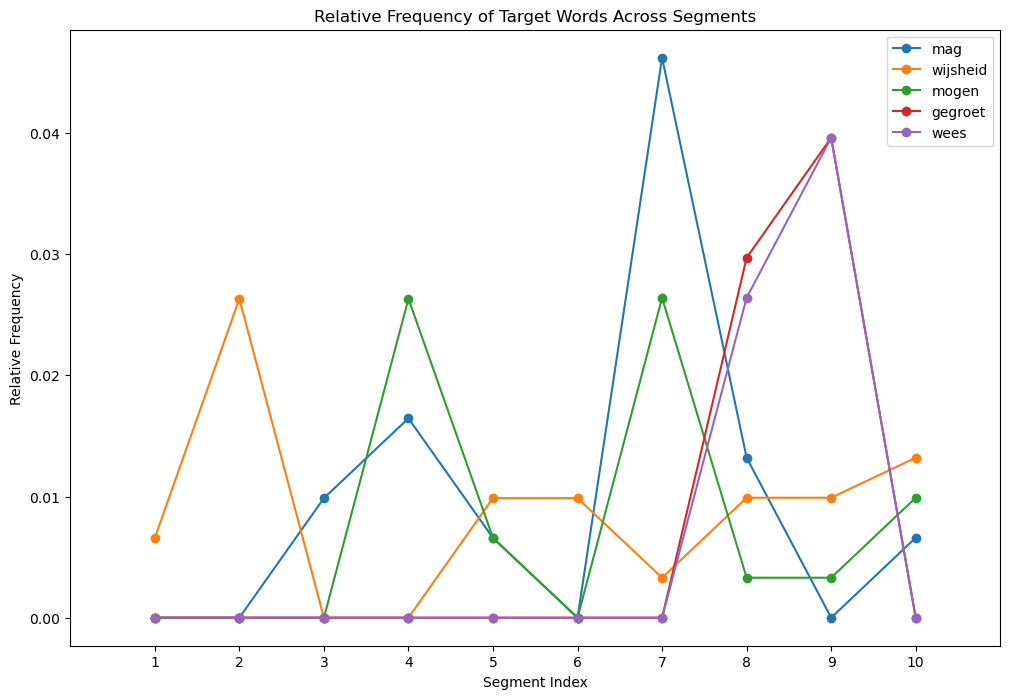

In [208]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/sutras_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['mag', 'wijsheid', 'mogen', 'gegroet', 'wees']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

The appearance in this section of "wijsheid" hints at its subject matter: to gain wisdom through Buddhism. It is peculiar the appearance of "wees" toward the end, although it may make thematic sense in the text.

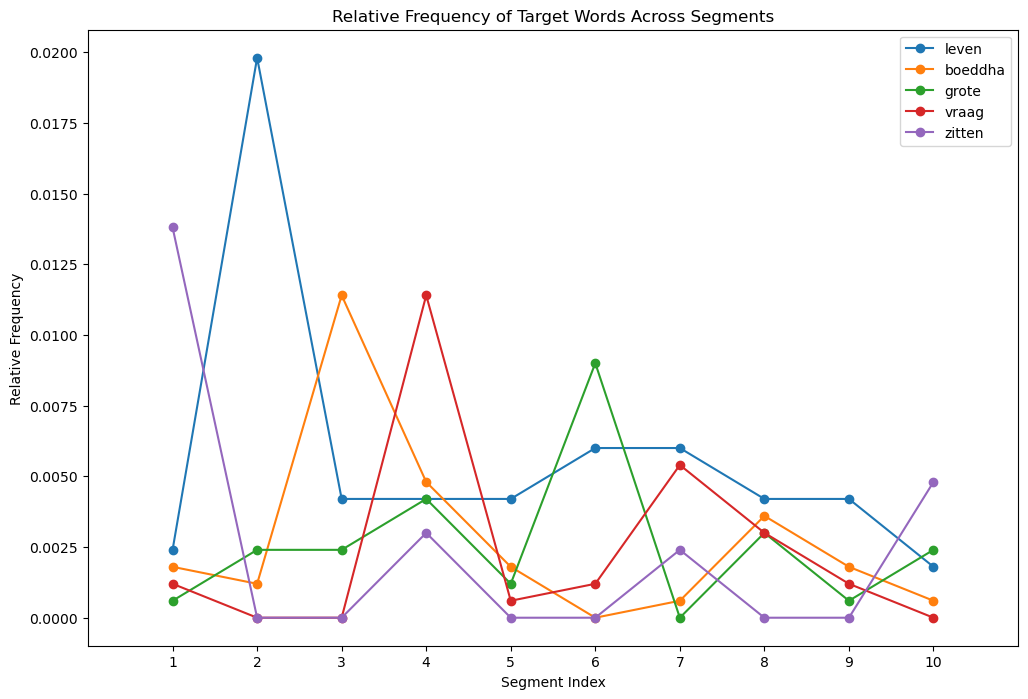

In [209]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teishos_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['leven', 'boeddha', 'grote', 'vraag', 'zitten']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

This is the section with a list of most common words most similar to the overall text. Interestingly, the word "zitten" shows up, perhaps meaning that this section also focuses on practice.

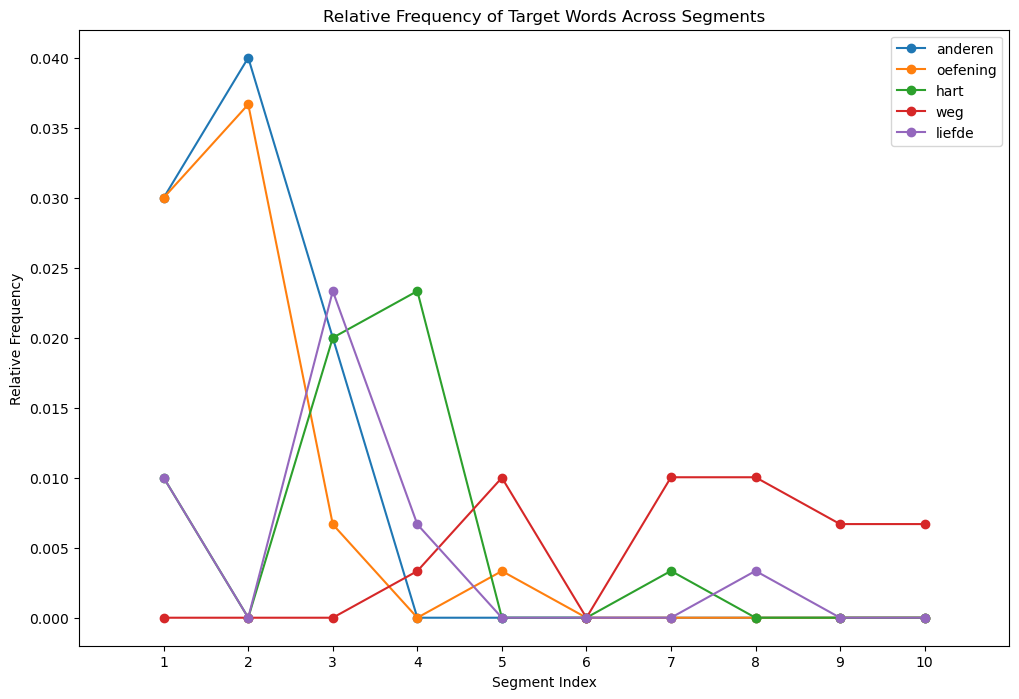

In [222]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/teksten_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['anderen', 'oefening', 'hart', 'weg', 'liefde']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)


This text speaks of "anderen", "oefening", and "hart", most likely pointing towards practices of compasion that will lead to a more harmonious existence in community.

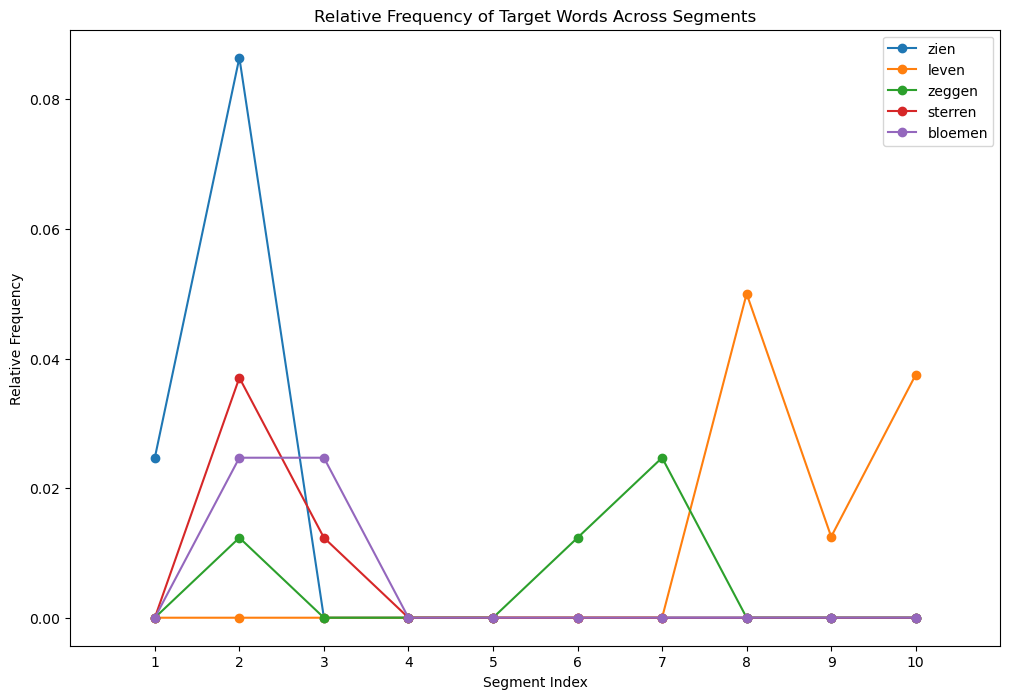

In [223]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/poezie_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['zien', 'leven', 'zeggen', 'sterren', 'bloemen']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

The poetry section clearly focuses more on nature and the external world, inciting the reader to see it and appreciate it.

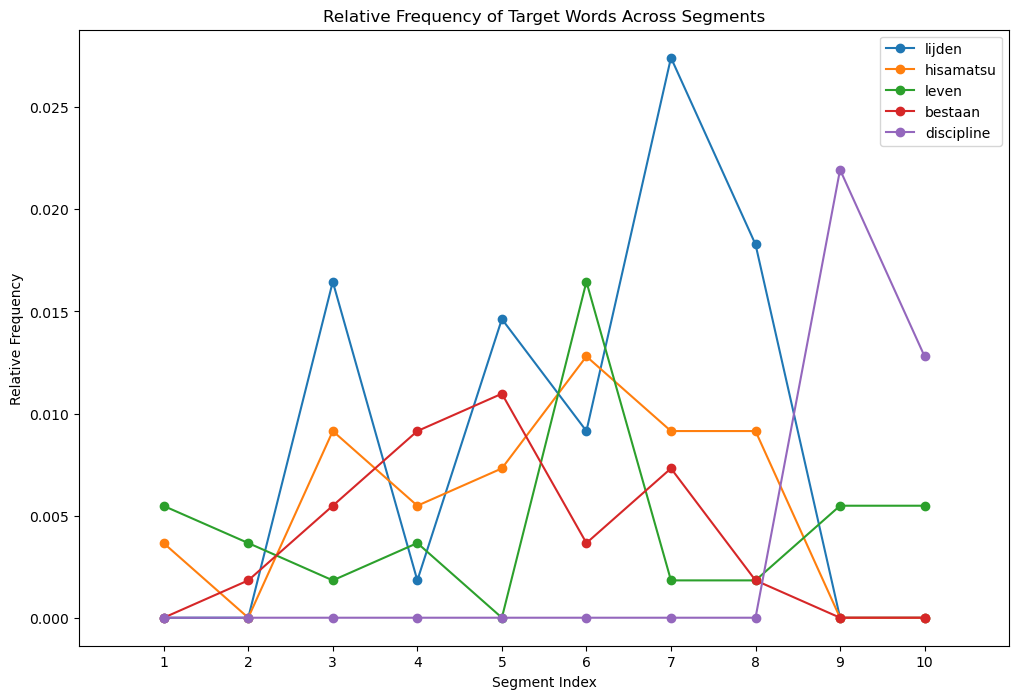

In [224]:
num_segments = 10

with open('C:/Users/area-/Desktop/KU Leuven/Digital Humanities/Fall 2023/Scripting Languages/Assignments/artikels_normalized.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    words = nltk.word_tokenize(text)
    
five_most_common = ['lijden', 'hisamatsu', 'leven', 'bestaan', 'discipline']
num_segments = 10

plot_relative_frequencies_over_segments(words, five_most_common, num_segments)

Unlike the poems, the articles seem to fixate much more on the negative aspects of life and how to deal with existence through discipline. It also speaks of Hisamatsu, a Zen Buddhist scholar known for his proficiency at brewing tea. This reference tells us that the website belongs to the Zen branch of Buddhism.

This is the end of this short example of how a researcher may choose to scrape a website and use text analysis tools on it. I hope it was helpful!